In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('P39-Financial-Data.csv')

In [4]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [5]:
dataset.dtypes

entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object

In [6]:
dataset.describe

<bound method NDFrame.describe of        entry_id  age  pay_schedule  home_owner  income  months_employed  \
0       7629673   40     bi-weekly           1    3135                0   
1       3560428   61        weekly           0    3180                0   
2       6934997   23        weekly           0    1540                6   
3       5682812   40     bi-weekly           0    5230                0   
4       5335819   33  semi-monthly           0    3590                0   
...         ...  ...           ...         ...     ...              ...   
17903   9949728   31       monthly           0    3245                0   
17904   9442442   46     bi-weekly           0    6525                0   
17905   9857590   46        weekly           0    2685                0   
17906   8708471   42     bi-weekly           0    2515                0   
17907   1498559   29        weekly           1    2665                0   

       years_employed  current_address_year  personal_account_m  

Cleaning data

In [7]:
# Checking for Nan
dataset.isna().sum(axis = 0)

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

Histograms

In [8]:
df_Numerical = dataset.drop(columns = ['entry_id', 'e_signed', 'pay_schedule'])

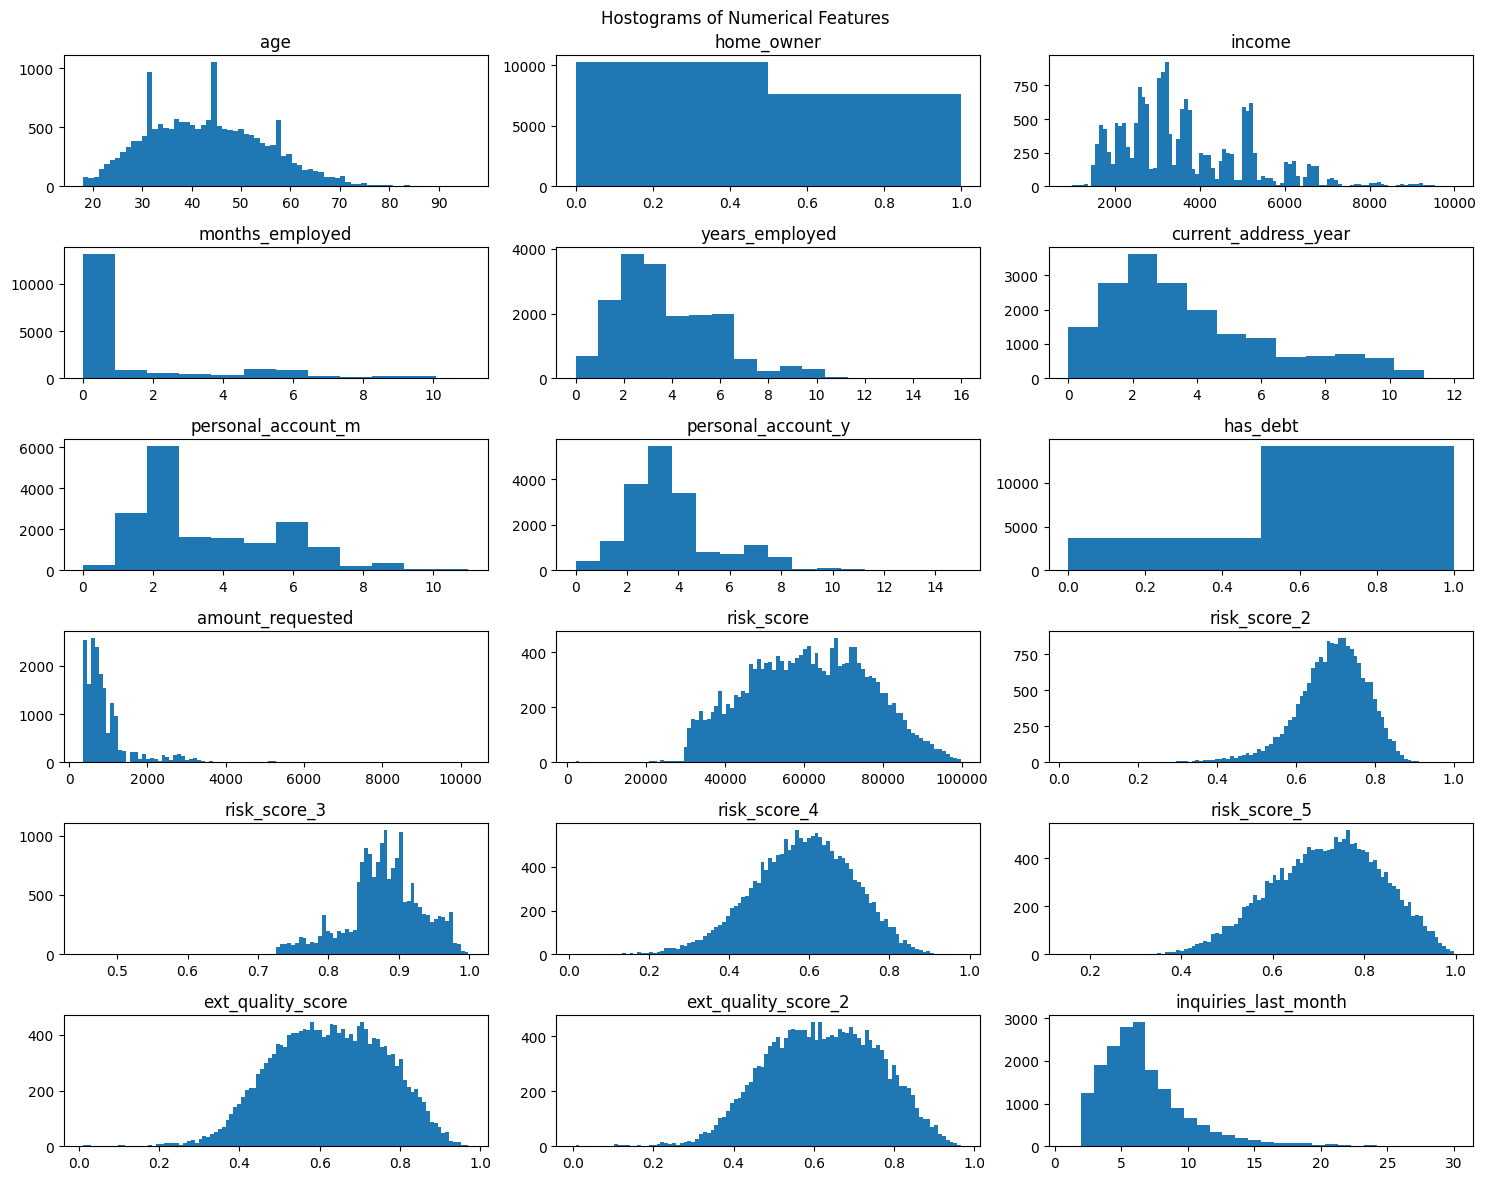

In [9]:
plt.figure(figsize = (15,12))
plt.suptitle("Hostograms of Numerical Features")
for i in range(df_Numerical.shape[1]):
    plt.subplot(6, 3, i+1)
    ax = plt.gca()
    ax.set_title(df_Numerical.columns.values[i])
    
    vals = len(list(df_Numerical.iloc[:,i].value_counts()))
    if vals>100:
        vals = 100
    
    ax.hist(df_Numerical.iloc[:, i], bins = vals)
plt.tight_layout()
plt.show()


Correlation with response variable

<Axes: title={'center': 'Correlation with E-signed'}>

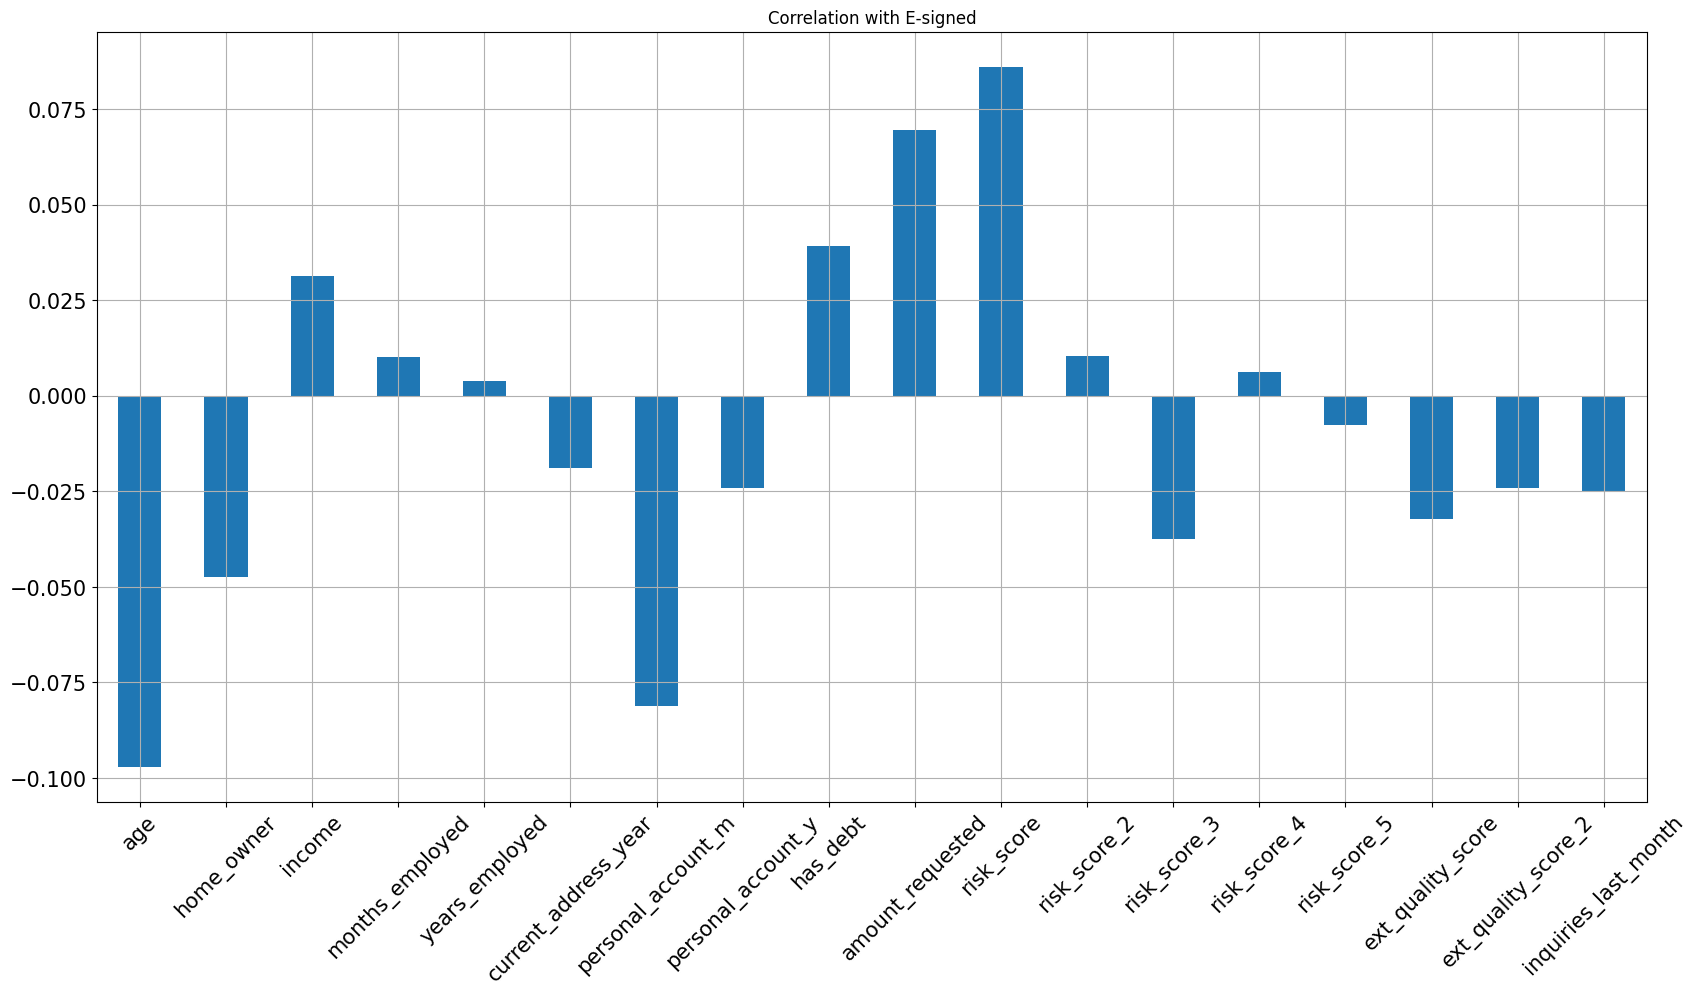

In [10]:
df_Numerical.corrwith(dataset.e_signed).plot.bar(figsize = (20,10), 
                                                 title='Correlation with E-signed',
                                                 rot = 45, grid = True, fontsize = 15 )

<Axes: >

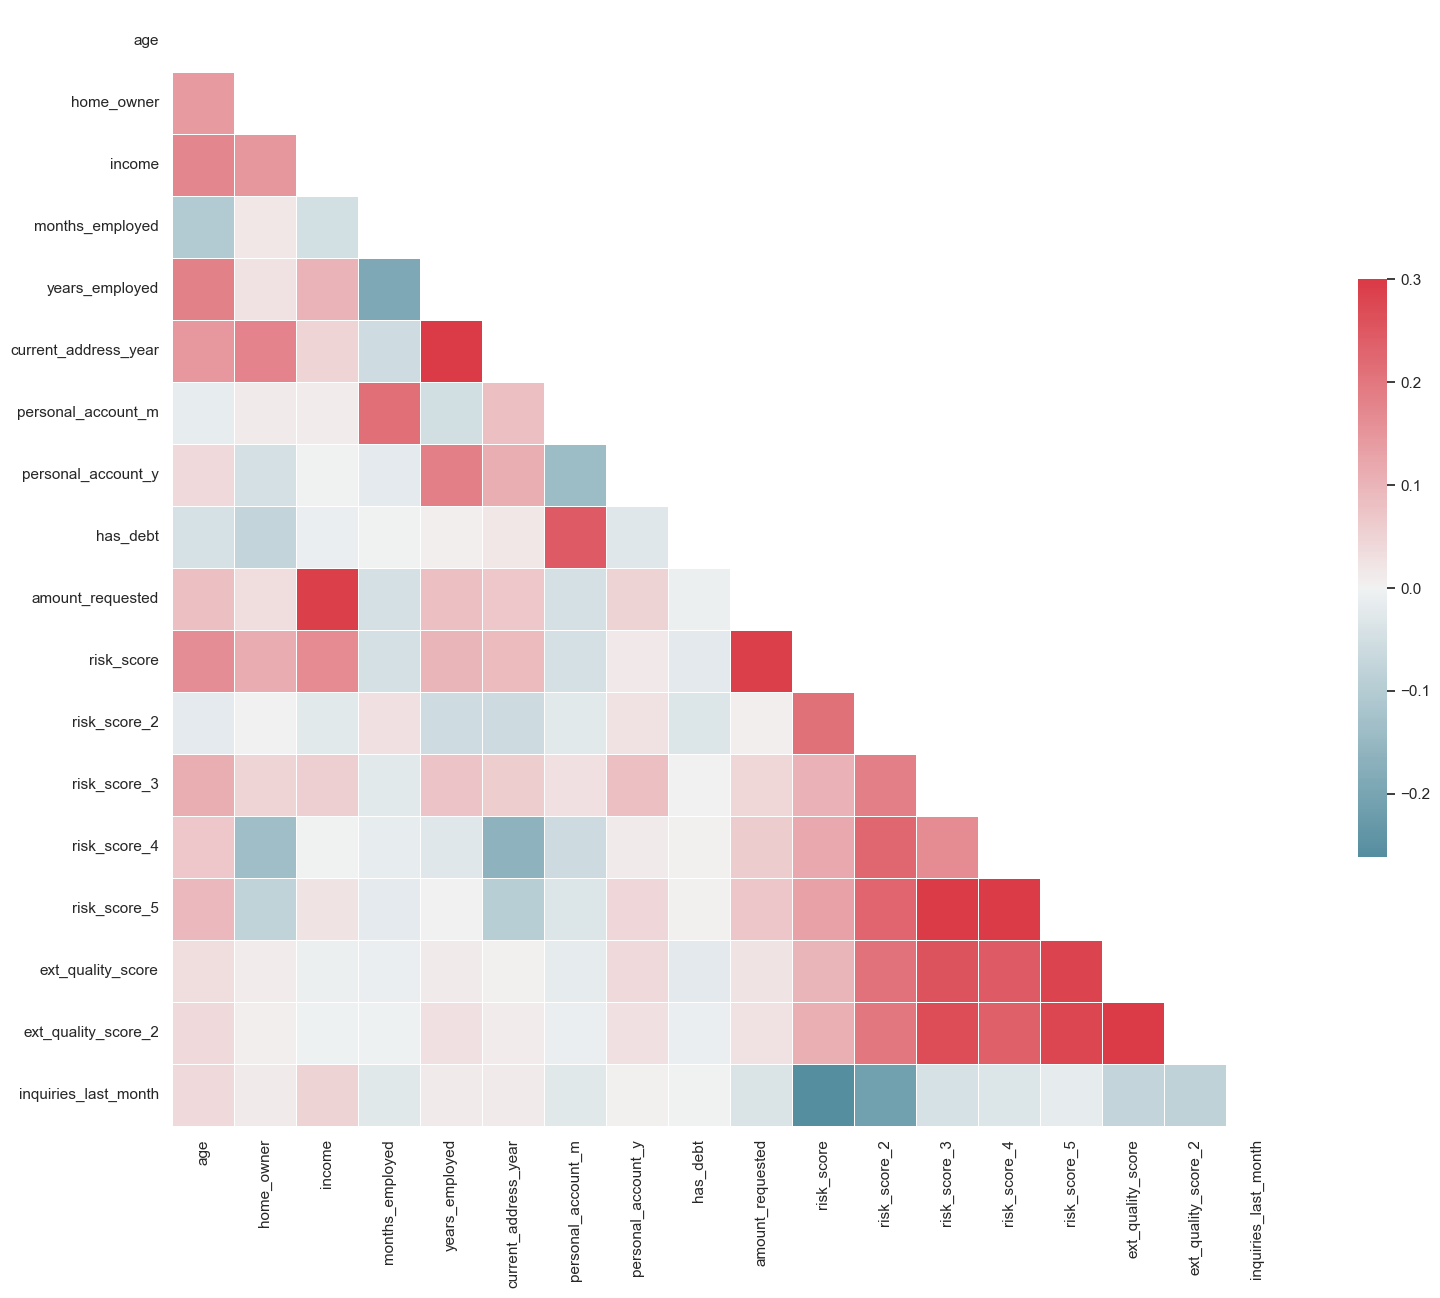

In [11]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df_Numerical.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
dataset['personal_account_months'] = (dataset['personal_account_m'] + dataset['personal_account_y']*12)

In [13]:
dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

In [14]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,0,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,0,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,6,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,0,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,0,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


One Hot Encoding

In [15]:
dataset = pd.get_dummies(dataset)

In [16]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,has_debt,amount_requested,risk_score,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,1,550,36200,...,0.515977,0.580918,0.380918,10,1,30,True,False,False,False
1,3560428,61,0,3180,0,6,3,1,600,30150,...,0.826402,0.730720,0.630720,9,0,86,False,False,False,True
2,6934997,23,0,1540,6,0,0,1,450,34550,...,0.762284,0.531712,0.531712,7,0,19,False,False,False,True
3,5682812,40,0,5230,0,6,1,1,700,42150,...,0.778831,0.792552,0.592552,8,1,86,True,False,False,False
4,5335819,33,0,3590,0,5,2,1,1100,53850,...,0.665523,0.744634,0.744634,12,0,98,False,False,True,False


In [17]:
dataset.replace(True, 1, inplace = True)
dataset.replace(False, 0, inplace = True)

Removing Extra Columns

In [18]:
Response = dataset['e_signed']
user_id = dataset['entry_id']
X = dataset.drop(columns = ['e_signed', 'entry_id'])
y =dataset['e_signed']

Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2 , random_state= 0) 

In [20]:
X.shape

(17908, 21)

In [21]:
X_train.shape

(14326, 21)

In [22]:
X_test.shape

(3582, 21)

In [23]:
y_test

3629     1
1820     1
6685     0
17241    1
8332     1
        ..
7546     1
9836     1
7446     1
9526     1
13946    1
Name: e_signed, Length: 3582, dtype: int64

Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [25]:
X_train_scaled = pd.DataFrame(sc_x.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc_x.fit_transform(X_test))
X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns = X_test.columns.values
X_train_scaled.index = X_train.index
X_test_scaled.index = X_test.index
X_train = X_train_scaled
X_test = X_test_scaled

In [26]:
X_train

,age,home_owner,income,months_employed,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
5957,-0.005991,-0.856349,-0.242358,2.010065,-1.567782,-0.573557,0.507058,-0.642580,-1.905162,-1.190501,...,0.979893,-0.229380,-1.060059,-1.057386,1.784494,0.368965,-1.224638,-0.302360,-0.356075,1.976827
16854,-0.509890,-0.856349,-0.052592,1.592692,0.206559,-0.937970,0.507058,-0.785621,-0.749184,1.254553,...,-0.396208,0.823356,0.041801,-0.672086,-0.663369,-0.280906,-1.224638,3.307315,-0.356075,-0.505861
4429,-0.761840,1.167748,-0.412149,-0.494169,-1.124197,-0.937970,-1.972161,-0.642580,-1.437575,0.532590,...,-0.086860,-0.775633,0.588358,-0.841550,1.240525,0.195666,0.816568,-0.302360,-0.356075,-0.505861
13607,1.421722,1.167748,-0.638537,-0.494169,0.650144,2.341745,0.507058,-0.785621,-0.680994,-0.642460,...,-1.252980,-1.027524,1.532749,0.817422,-0.119399,2.361903,0.816568,-0.302360,-0.356075,-0.505861
3750,-1.601671,-0.856349,-1.041374,-0.494169,1.093729,2.341745,0.507058,-0.499539,0.780214,-0.248764,...,-0.910402,0.225551,0.108871,1.541402,-0.935353,-0.150932,0.816568,-0.302360,-0.356075,-0.505861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,0.749857,-0.856349,-0.418808,-0.494169,0.650144,-0.209144,0.507058,-0.499539,-0.294586,0.745302,...,0.373144,1.218247,-1.192116,-1.189316,-0.119399,-0.150932,-1.224638,-0.302360,-0.356075,1.976827
13123,-1.181756,1.167748,-1.311042,0.757948,-0.237027,-0.573557,0.507058,-0.356498,-0.447201,0.032793,...,0.380844,-1.246395,0.046706,1.479297,-0.391384,-0.194257,0.816568,-0.302360,-0.356075,-0.505861
9845,0.161975,-0.856349,-0.465417,0.340575,-0.680612,-0.937970,0.507058,-0.714101,-1.817490,-0.407938,...,0.375016,0.221194,-1.444564,-1.441521,0.424570,-1.450674,0.816568,-0.302360,-0.356075,-0.505861
10799,1.085790,-0.856349,-0.698463,-0.494169,2.424485,1.612919,-1.972161,2.504320,-0.882316,-0.293826,...,1.056861,0.992394,0.131173,0.848189,-0.663369,3.834944,-1.224638,-0.302360,2.808398,-0.505861


Model Building

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [28]:
model = LogisticRegression(random_state= 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
y_pred = model.predict(X_test)

In [30]:
acc_s = accuracy_score(y_test, y_pred)
pre_s = precision_score(y_test, y_pred)
rec_s = recall_score(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)

In [31]:
results = pd.DataFrame([['Logistic Regression (Lasso)', acc_s, pre_s, rec_s, f1_s]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [32]:
## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results],axis = 0,ignore_index=True)

In [33]:
## SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results],axis = 0,ignore_index=True)

In [34]:
## SVM (rbf)
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
RF_classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = RF_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results],axis = 0,ignore_index=True)

In [35]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.564210,0.578587,0.700726,0.633826
1,SVM (Linear),0.569514,0.579424,0.730290,0.646168
2,SVM (RBF),0.592406,0.607537,0.685685,0.644250
3,Random Forest (n=100),0.623674,0.644855,0.669606,0.656997


K-Fold Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator= classifier, X =X_train, y = y_train, cv =10)


In [37]:
print("Random Forest Classifier Accuracy: {:.3}".format(scores.mean()))

Random Forest Classifier Accuracy: 0.61


Parameter Tuning

In [38]:
import time

In [39]:
# Round 1: Entropy
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RF_classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 945.58 seconds


(0.6366085525931066,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 10,
  'min_samples_split': 2})

In [40]:
#Round 2: Entropy
parameters = {"max_depth": [None],
              "max_features": [8,10, 12],
              'min_samples_split': [2,3,4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

ValueError: Invalid parameter 'bootstrap' for estimator SVC(random_state=0). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].

In [ ]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results],axis = 0,ignore_index=True)

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.564210,0.578587,0.700726,0.633826
1,SVM (Linear),0.569514,0.579424,0.730290,0.646168
2,SVM (RBF),0.592406,0.607537,0.685685,0.644250
3,Random Forest (n=100),0.623674,0.644855,0.669606,0.656997
4,"Random Forest (n=100, GSx2 + Entropy)",0.631491,0.645455,0.699689,0.671478


In [ ]:
# Round 1: Gini
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RF_classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 835.10 seconds


(0.6373750034112129,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [ ]:
# Round 2: Gini
parameters = {"max_depth": [None],
              "max_features": [3, 5 ,7],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [3, 5, 7],
              "bootstrap": [True],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RF_classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


Took 262.47 seconds


(0.6373750034112129,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [ ]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = pd.concat([results, model_results],axis = 0,ignore_index=True)

In [ ]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.564210,0.578587,0.700726,0.633826
1,SVM (Linear),0.569514,0.579424,0.730290,0.646168
2,SVM (RBF),0.592406,0.607537,0.685685,0.644250
3,Random Forest (n=100),0.623674,0.644855,0.669606,0.656997
4,"Random Forest (n=100, GSx2 + Entropy)",0.631491,0.645455,0.699689,0.671478
5,"Random Forest (n=100, GSx2 + Gini)",0.629257,0.643678,0.697095,0.669323


In [ ]:
final_model = RandomForestClassifier(bootstrap = True,
  criterion = 'entropy',
  max_depth = None,
  max_features = 8,
  min_samples_leaf = 10,
  min_samples_split = 2)

In [ ]:
final_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=8, min_samples_leaf=10)

In [ ]:
y_pred = final_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

Test Data Accuracy: 0.6315


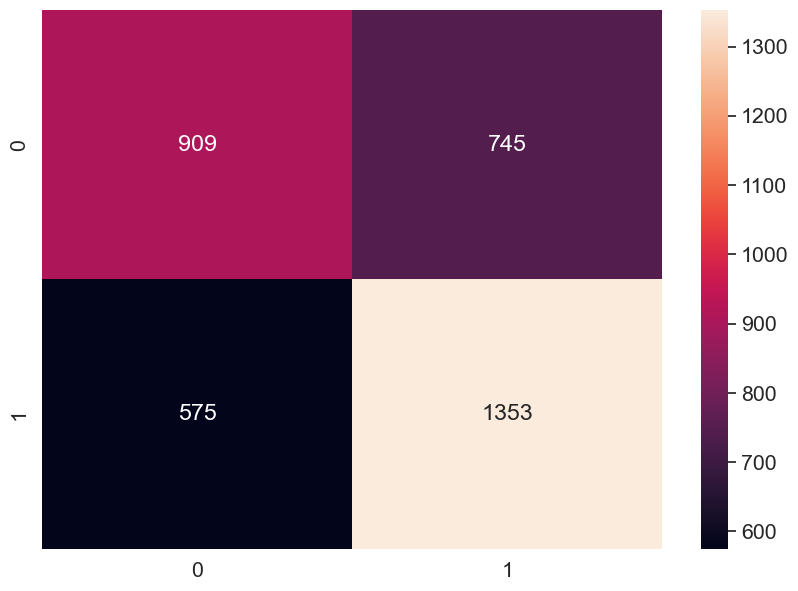

In [ ]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

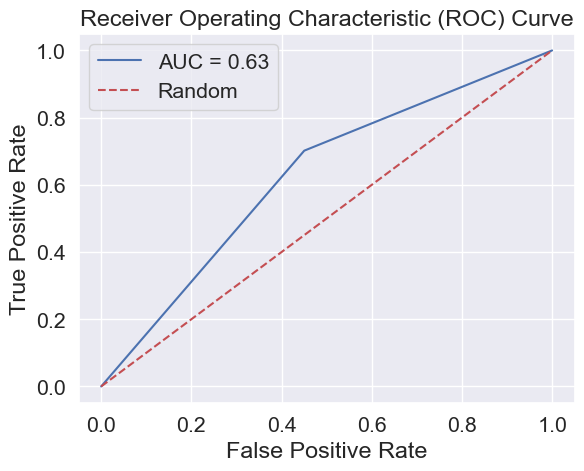

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # y_pred_prob is the predicted probabilities
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


#### End of Model ####

In [ ]:
# Formatting Final Results

final_results = pd.concat([y_test, user_id], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]

In [1]:
pd.set_option('display.max_rows', None) 
final_results.head()

NameError: name 'pd' is not defined